# Proyecto 2 - Clasificación

## Laboratorio de Aprendizaje Estadístico

#### Fecha: 4 de Octubre 2025
### Integrantes:

|                |   |
:----------------|---|
| **Expediente**     | **Nombre**  |
| 742594 | Ana Sofía Hinojosa Bale  |
| 739208 | Julia Hernández Cardenas  |
| 750733 | Sara Hernández Ochoa  |

# Objetivos

## Generales

Desarrollar un modelo predictivo que clasifique transacciones financieras como fraudulentas o legítimas, maximizando la capacidad de detección de fraude a través de métricas de rendimiento como el ROC AUC, utilizando modelos de aprendizaje supervisado y optimización de hiperparámetros.

## Específicos

**1. Preprocesamiento de datos:**

Preprocesar los datos eliminando valores faltantes y columnas irrelevantes, convirtiendo variables categóricas en dummies y estandarizando las variables numéricas para que sean compatibles con los modelos.

**2. Implementación de Regresión Logística:**

Entrenar un modelo de Regresión Logística mediante validación cruzada para evaluar su desempeño y estabilidad en distintas particiones del dataset, y medir su capacidad de predicción de fraude.

**3. Implementación de SVM con kernel RBF:**

Entrenar un modelo de SVM, evaluando métricas como accuracy y ROC AUC, y analizar cómo el parámetro de regularización C afecta la capacidad de clasificación.

**4. Implementación de MLP (Perceptrón Multicapa):**

Entrenar un MLP con dos capas ocultas, ajustando el parámetro de regularización α y evaluando la capacidad del modelo para capturar relaciones no lineales en los datos.

**5. Optimización de hiperparámetros:**

Aplicar Optimización Bayesiana para encontrar la configuración óptima de los hiperparámetros de cada modelo (C para Regresión Logística y SVM, α para MLP) que maximice la ROC AUC.

**6. Comparación y selección del mejor modelo:**

Comparar los modelos entrenados utilizando métricas de desempeño, identificar cuál tiene mejor capacidad para detectar fraude, e interpretar los resultados para futuras mejoras, incluyendo balanceo de clases o ingeniería de variables.


# Marco Teórico


### 1. Regresión Logística
La Regresión Logística estima la probabilidad de que una transacción sea fraudulenta mediante la función sigmoide:

$$
P(y=1|x) = \frac{1}{1 + e^{-z}}, \quad z = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$
Esta fórmula calcula la probabilidad de que una transacción sea fraudulenta transformando una combinación lineal de las variables predictoras.

Se entrena el modelo maximizando la verosimilitud:

$$
L(\beta) = \prod_{i=1}^{N} P(y_i|x_i)^{y_i} [1 - P(y_i|x_i)]^{1 - y_i}
$$
La verosimilitud mide qué tan bien los parámetros del modelo explican los datos observados.

La regularización L2 se aplica para evitar sobreajuste:

$$
J(\beta) = -\frac{1}{N}\sum_{i=1}^{N} \left[ y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y_i}) \right] + \frac{\lambda}{2}\|\beta\|^2
$$
Esta función combina el error de predicción con un término que penaliza coeficientes demasiado grandes.

---

### 2. Máquina de Soporte Vectorial (SVM)
SVM busca maximizar el margen entre clases mientras controla los errores:

$$
\min_{w,b} \frac{1}{2}\|w\|^2 + C \sum_{i=1}^{N} \xi_i
$$
Se minimiza la norma de los pesos (maximizando el margen) y se penalizan los errores con el parámetro \(C\).

sujeto a:

$$
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$
Estas restricciones aseguran que las transacciones sean clasificadas correctamente, permitiendo algunos errores si es necesario.

Se utiliza kernel RBF para transformar los datos a un espacio de mayor dimensionalidad:

$$
K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
$$
El kernel RBF permite que SVM encuentre fronteras de decisión no lineales entre transacciones legítimas y fraudulentas.

---

### 3. Perceptrón Multicapa (MLP)
MLP es un modelo que aprende relaciones no lineales entre las variables de entrada y la variable objetivo:

$$
h_j = f\left(\sum_{i} w_{ij} x_i + b_j\right), \quad f(x) = \max(0, x)
$$
Cada unidad calcula una combinación de las variables de entrada y aplica una función de activación para capturar relaciones complejas en los datos.

El entrenamiento minimiza la entropía cruzada:

$$
E = - \sum_{i=1}^{N} \left[ y_i \log(\hat{y_i}) + (1 - y_i)\log(1-\hat{y_i}) \right]
$$
Esta función mide qué tan bien el modelo predice las probabilidades correctas de fraude.

Con regularización L2:

$$
J(W) = E + \alpha \|W\|^2
$$
Se añade un término de penalización sobre los coeficientes para evitar sobreajuste en el modelo.

---

### 4. Optimización Bayesiana con Procesos Gaussianos (GPR)
Se usa para ajustar hiperparámetros de manera eficiente, modelando la función objetivo como un proceso gaussiano:

$$
f(x) \sim \mathcal{GP}(m(x), k(x, x'))
$$
Esto define una distribución sobre funciones posibles que se ajustan a los datos observados.

Kernel RBF:

$$
k(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right)
$$
El kernel RBF determina la similitud entre configuraciones de hiperparámetros y controla la suavidad de la función estimada.

Se selecciona el siguiente punto a evaluar usando el punto de máxima incertidumbre, definido como la diferencia entre el límite superior y el límite inferior de la predicción:

$$
x_{\text{next}} = \arg\max \left( y_{\text{upper}}(x) - y_{\text{lower}}(x) \right)
$$

donde para un intervalo de confianza del 95%:

$$
y_{\text{upper}}(x) = \mu(x) + 1.96 \cdot \sigma(x)
$$

$$
y_{\text{lower}}(x) = \mu(x) - 1.96 \cdot \sigma(x)
$$

Se elige el siguiente hiperparámetro buscando el punto donde el modelo tiene **mayor incertidumbre**, lo que permite explorar regiones del espacio de hiperparámetros donde el modelo es menos confiable y potencialmente mejorar la optimización.

---

### 5. Pruebas de Kolmogorov–Smirnov y Chi-Cuadrado

Las pruebas estadísticas de **Kolmogorov–Smirnov (K–S)** y **Chi-cuadrado (χ²)** se utilizan para evaluar si dos distribuciones difieren significativamente, permitiendo validar que una muestra representa adecuadamente al conjunto de datos original.

#### 5.1 Prueba de Kolmogorov–Smirnov (K–S)

La prueba de **Kolmogorov–Smirnov** compara las distribuciones acumuladas de dos conjuntos de datos continuos, evaluando la distancia máxima entre ambas funciones de distribución empírica:

$$D = sup_x | F1(x) - F2(x) |$$

donde:

- $F1(x)$ y $F2(x)$ son las funciones de distribución acumulada (FDA) de la muestra y del dataset original, respectivamente.  
- $D$ representa la mayor diferencia vertical entre las dos FDA.

El **estadístico K–S** se interpreta de la siguiente manera:

- Si el $p-value > \alpha$ (por ejemplo, 0.05), **no se rechaza la hipótesis nula**, indicando que ambas distribuciones son estadísticamente iguales.  
- Si el $p-value < \alpha$, se rechaza la hipótesis nula, concluyendo que las distribuciones difieren significativamente.

Esta prueba no asume una distribución específica, por lo que resulta útil para comparar variables numéricas en contextos donde no se conoce la distribución subyacente.

#### 5.2 Prueba de Chi-Cuadrado $\chi^2$

La **prueba de Chi-cuadrado** se utiliza para comparar distribuciones de **variables categóricas**, verificando si la frecuencia observada en una muestra difiere de la frecuencia esperada según el dataset original. El estadístico $\chi^2$ se define como:

$$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$$

donde:

- $O_i$ representa la frecuencia observada en la categoría i,  
- $E_i$ es la frecuencia esperada para esa categoría bajo la hipótesis nula,  
- $k$ es el número total de categorías.

La interpretación es la siguiente:

- Si el $p-value > \alpha$, no se rechaza la hipótesis nula, indicando que la distribución de la variable categórica en la muestra **no difiere significativamente** de la del dataset completo.  
- Si el $p-value < \alpha$, existe evidencia de diferencia significativa entre ambas distribuciones.

#### 5.3 Interpretación Conjunta

Ambas pruebas permiten verificar que la **muestra del 5 % del dataset original** mantiene la **misma estructura estadística** que el conjunto completo.  

En este caso, como **ninguna variable (numérica ni categórica)** mostró diferencias significativas, se concluye que la **muestra es representativa** y puede emplearse sin comprometer la validez del análisis posterior.

# Análisis del Dataset

**¿De dónde viene?**

El dataset fue descargado directamente desde la plataforma Kaggle mediante la librería kagglehub, la cual permite obtener datasets automáticamente en Python para análisis de datos y machine learning.

**¿Qué contiene?**

El dataset contiene información sobre transacciones con tarjeta de crédito, incluyendo tanto variables numéricas como categóricas. Entre las variables más relevantes se encuentran:
Amount: monto de la transacción

- Age: edad del titular de la tarjeta

- Merchant Group: tipo de comercio

- Type of Card: tipo de tarjeta utilizada

- Bank: banco emisor

- Gender: género del titular

- Country of Transaction: país donde se realizó la transacción

- Entry Mode: forma de entrada de la transacción (POS, Tap, PIN, etc.)

- Type of Transaction: POS, Online, etc.

- Day of Week: día de la semana

- Fraud: etiqueta que indica si la transacción es fraudulenta (True/False)

**¿Qué información dan las muestras?**

Cada registro representa una transacción individual. Las variables numéricas como Amount y Age permiten cuantificar la transacción y características del titular, mientras que las categóricas describen el contexto (tipo de tarjeta, banco, país, etc.). La variable objetivo Fraud indica si la transacción fue identificada como fraude, lo que convierte este dataset en un problema de clasificación binaria.

**¿Qué se quiere analizar?**

Se busca detectar transacciones fraudulentas mediante modelos de aprendizaje supervisado. El objetivo es identificar patrones que distingan transacciones legítimas de fraudulentas, optimizando la predicción mediante métricas como ROC AUC y accuracy.

**¿Qué variables se tienen que transformar para poder usarse en un modelo de regresión?**

Las variables categóricas (Merchant Group, Type of Card, Bank, Gender, Country of Transaction, Entry Mode, Type of Transaction) deben convertirse en variables dummy o one-hot encoding.

La variable Day of Week se transforma a valores numéricos (0 = Monday, 6 = Sunday) para poder usarse como predictor.

Las variables numéricas (Amount, Age) se deben escalar o estandarizar para que tengan media cero y desviación estándar uno, evitando que valores grandes dominen a los modelos.

**¿Qué transformaciones se van a usar?**

- Eliminación de columnas irrelevantes (Transaction ID, Date, Shipping Address, Country of Residence).

- Codificación de variables categóricas a dummies con drop_first=True para evitar multicolinealidad.

- Escalado de variables numéricas usando StandardScaler.

**¿Qué resultado se podría encontrar al realizar una regresión?**

Al aplicar modelos de clasificación como Regresión Logística, SVM o MLP sobre estas variables preprocesadas, se espera obtener:

- Probabilidades de que cada transacción sea fraudulenta.

- Métricas de desempeño que permitan evaluar la calidad del modelo, como ROC AUC, accuracy, precision y recall.

- Identificación de patrones relevantes en las variables predictoras que más influyen en la detección de fraude.

# Pipeline

![La imagen del pipeline se puede encontrar en el repositorio como 'pipeline.jpeg'](pipeline.jpeg)

# Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from scipy.stats import chi2_contingency, ks_2samp
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve
)
from sklearn.model_selection import (
    cross_val_predict,
    cross_validate,
    KFold
)
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

colors = ["lightpink", "palevioletred", "maroon"]
pink_cmap = LinearSegmentedColormap.from_list("pvr_to_maroon", colors, N=256)

colors2 = ["lavenderblush", "palevioletred", "darkred"]
pink_cmap_simple = LinearSegmentedColormap.from_list("white_to_pvr", colors2, N=256)

# Manejo de datos y definición de funciones

In [2]:
df = pd.read_csv("CreditCardData.csv")

In [3]:
def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    data = data.dropna().reset_index(drop=True)
    data = data.drop(columns=['Transaction ID',
                              'Date',
                              'Shipping Address',
                              'Country of Residence'])
    data['Amount'] = data['Amount'].replace('£', '', regex=True).astype(float)
    data = pd.get_dummies(data, columns=['Merchant Group',
                                         'Type of Card',
                                         'Bank',
                                         'Gender',
                                         'Country of Transaction',
                                         'Entry Mode',
                                         'Type of Transaction'], drop_first=True)
    data['Day of Week'] = data['Day of Week'].map({
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    })

    return data


def get_target(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    X = data.drop(columns=['Fraud'])
    y = data['Fraud']
    return X, y


def scaler(X: pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler()

    columns_to_scale = X.select_dtypes(include=['float64', 'int64']).columns
    X_scaled = X.copy()
    X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

    return X_scaled

def regresion_logistica(X: pd.DataFrame, y: pd.Series, kfolds, C: float, plot: bool = True) -> tuple:
    pipeline = Pipeline(steps=[
        ('model', LogisticRegression(C=C, random_state=42, max_iter=1000))
    ])

    scoring_metrics = {
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc'
    }

    scores = cross_validate(
        estimator=pipeline,
        X=X,
        y=y,
        cv=kfolds,
        scoring=scoring_metrics,
        return_train_score=False
    )

    if plot:
        y_pred_cv = cross_val_predict(pipeline, X, y, cv=kfolds, method='predict_proba')[:, 1]

        fpr, tpr, _ = roc_curve(y, y_pred_cv)
        roc_auc_fold = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='palevioletred', lw=2,
                 label=f'ROC (AUC = {roc_auc_fold:.2f})')
        plt.plot([0, 1], [0, 1], color='darkslategrey', lw=2, linestyle='--', label='Random Guessing')
        plt.fill_between(fpr, tpr, color='palevioletred', alpha=0.3)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.grid(linestyle=':', alpha=0.7)
        plt.show()

        y_pred_labels = (y_pred_cv >= 0.5).astype(int)
        cm = confusion_matrix(y, y_pred_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=pink_cmap_simple)
        plt.title("Matriz de confusión")
        plt.show()

    results = [{
        'model': 'Logistic Regression',
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'roc_auc_mean': scores['test_roc_auc'].mean(),
        'roc_auc_std': scores['test_roc_auc'].std()
    }]

    roc_auc_mean = scores['test_roc_auc'].mean()
    return roc_auc_mean, results

def sup_vector_machine(X: pd.DataFrame, y: pd.Series, kfolds: KFold, C: float, plot: bool) -> tuple:
    pipeline = Pipeline(steps=[
        ('model', SVC(C=C, kernel='rbf', random_state=42, probability=True))
    ])

    scoring_metrics = {
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc'
    }

    scores = cross_validate(
        estimator=pipeline,
        X=X,
        y=y,
        cv=kfolds,
        scoring=scoring_metrics,
        return_train_score=False
    )

    if plot:
        y_pred_cv = cross_val_predict(pipeline, X, y, cv=kfolds, method='predict_proba')[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_cv)
        roc_auc_fold = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='palevioletred', lw=2, label=f'ROC (AUC = {roc_auc_fold:.2f})')
        plt.plot([0, 1], [0, 1], color='darkslategrey', lw=2, linestyle='--', label='Random Guessing')
        plt.fill_between(fpr, tpr, color='palevioletred', alpha=0.3)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.grid(linestyle=':', alpha=0.7)
        plt.show()

        y_pred_labels = (y_pred_cv >= 0.5).astype(int)
        cm = confusion_matrix(y, y_pred_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=pink_cmap_simple)
        plt.title("Matriz de confusión")
        plt.show()

    results = [{
        'model': 'Support Vector Machine',
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'roc_auc_mean': scores['test_roc_auc'].mean(),
        'roc_auc_std': scores['test_roc_auc'].std()
    }]

    roc_auc_mean = scores['test_roc_auc'].mean()
    return roc_auc_mean, results


def mlp_classifier(X: pd.DataFrame, y: pd.Series, kfolds: KFold, plot: bool,
                   hidden_layer_sizes=(25, 17), activation='relu', solver='adam',
                   max_iter=200, random_state=42) -> tuple:
    pipeline = Pipeline(steps=[
        ('model', MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            max_iter=max_iter,
            random_state=random_state
        ))
    ])

    scoring_metrics = {
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc'
    }

    scores = cross_validate(
        estimator=pipeline,
        X=X,
        y=y,
        cv=kfolds,
        scoring=scoring_metrics,
        return_train_score=False
    )

    if plot:
        y_pred_cv = cross_val_predict(pipeline, X, y, cv=kfolds, method='predict_proba')[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_cv)
        roc_auc_fold = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='palevioletred', lw=2, label=f'ROC (AUC = {roc_auc_fold:.2f})')
        plt.plot([0, 1], [0, 1], color='darkslategrey', lw=2, linestyle='--', label='Adivinanza aleatoria')
        plt.fill_between(fpr, tpr, color='palevioletred', alpha=0.3)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.grid(linestyle=':', alpha=0.7)
        plt.show()

        y_pred_labels = (y_pred_cv >= 0.5).astype(int)
        cm = confusion_matrix(y, y_pred_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=pink_cmap_simple)
        plt.title("Matriz de confusión")
        plt.show()

    results = [{
        'model': 'MLP Classifier',
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'roc_auc_mean': scores['test_roc_auc'].mean(),
        'roc_auc_std': scores['test_roc_auc'].std()
    }]

    roc_auc_mean = scores['test_roc_auc'].mean()
    return roc_auc_mean, results


# Pruebas estadísticas e histogramas para el dataset

In [4]:
data_original = preprocess_data(df)
data = data_original.sample(frac=0.05, random_state=5).reset_index(drop=True)

In [5]:
data

,Day of Week,Time,Amount,Age,Fraud,Merchant Group_Electronics,Merchant Group_Entertainment,Merchant Group_Fashion,Merchant Group_Food,Merchant Group_Gaming,...,Bank_RBS,Gender_M,Country of Transaction_India,Country of Transaction_Russia,Country of Transaction_USA,Country of Transaction_United Kingdom,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_Online,Type of Transaction_POS
0,2,21,275.0,38.5,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2,11,6.0,51.3,0,True,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
2,1,22,271.0,38.6,0,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
3,2,20,125.0,32.4,0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,2,14,172.0,53.4,0,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2,19,22.0,49.1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4995,1,8,20.0,54.8,0,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4996,2,23,275.0,45.2,0,False,False,False,False,True,...,True,False,False,False,False,True,True,False,False,True
4997,2,9,188.0,21.3,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


No se detectaron diferencias significativas entre la muestra y el dataset completo.


<Figure size 600x400 with 0 Axes>

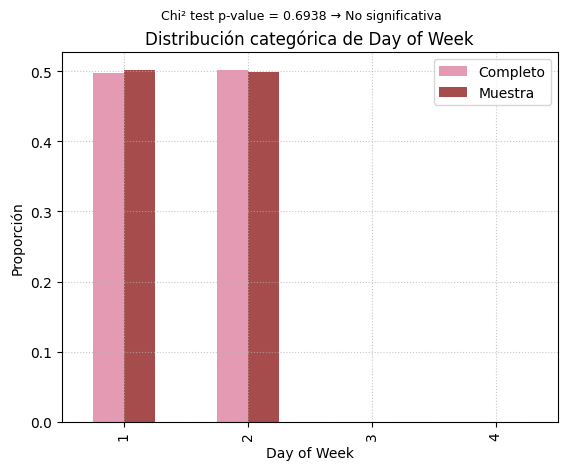

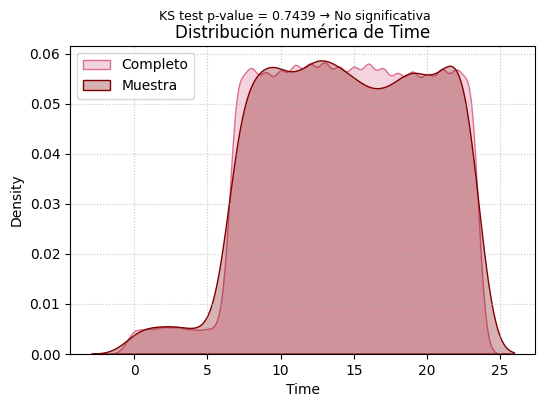

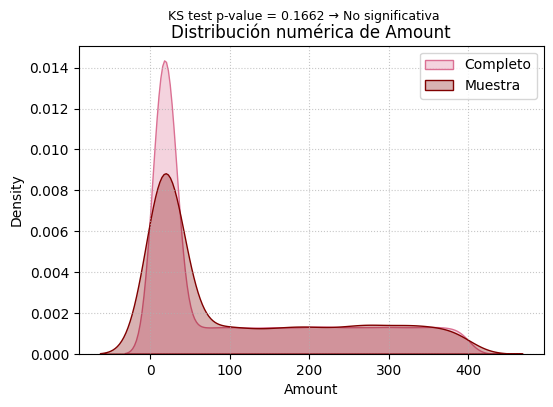

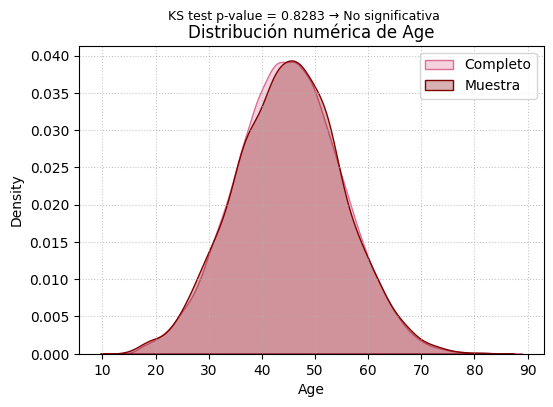

<Figure size 600x400 with 0 Axes>

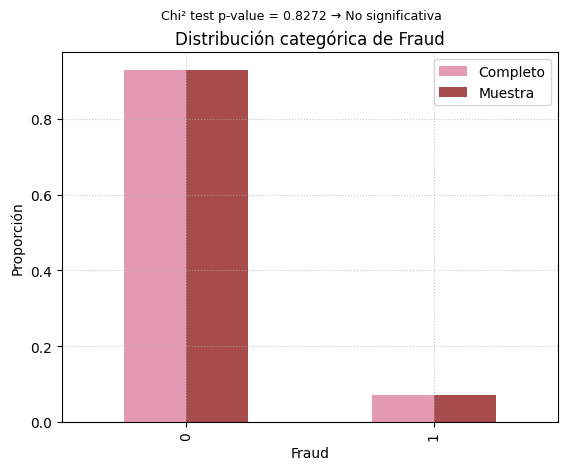

<Figure size 600x400 with 0 Axes>

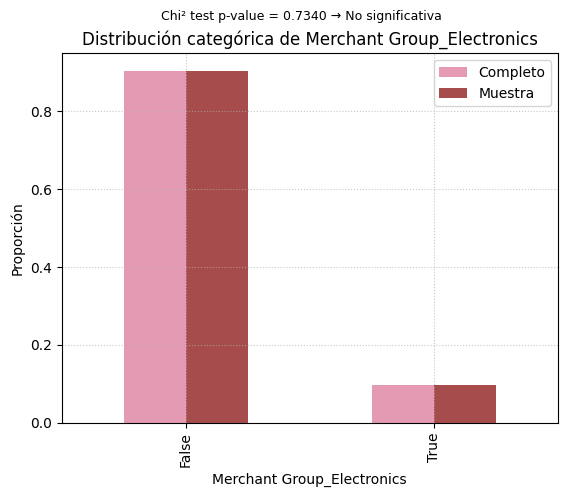

<Figure size 600x400 with 0 Axes>

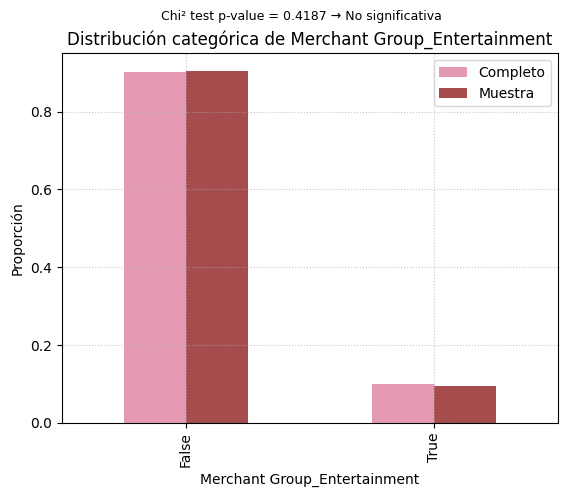

<Figure size 600x400 with 0 Axes>

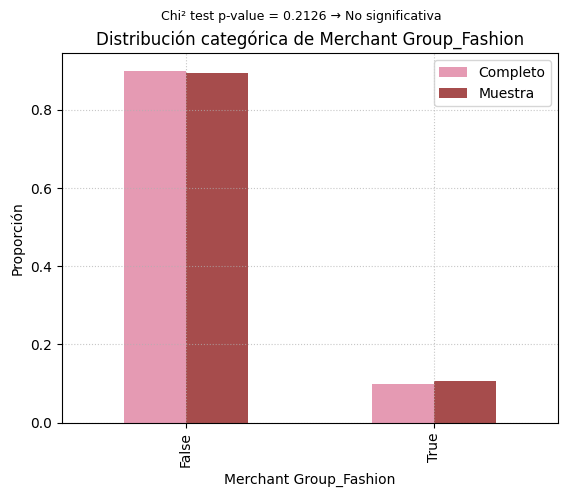

<Figure size 600x400 with 0 Axes>

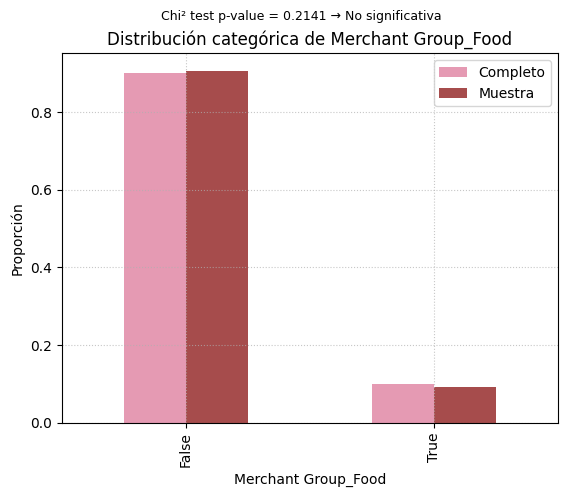

<Figure size 600x400 with 0 Axes>

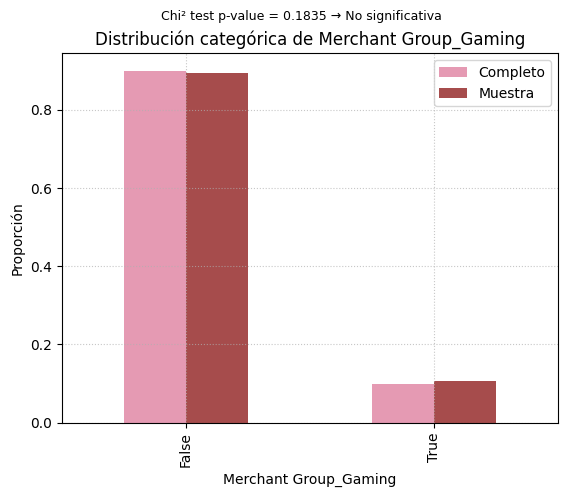

<Figure size 600x400 with 0 Axes>

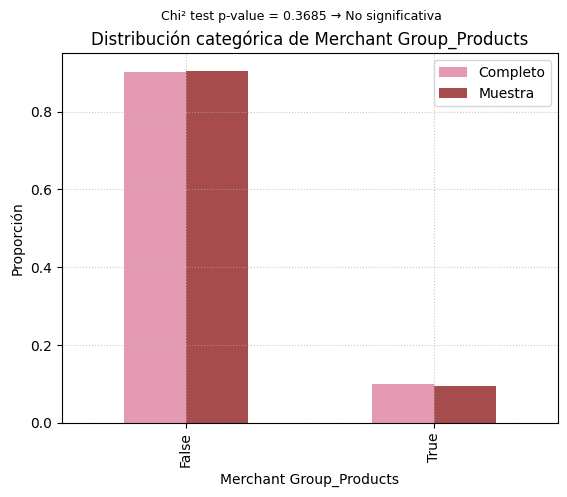

<Figure size 600x400 with 0 Axes>

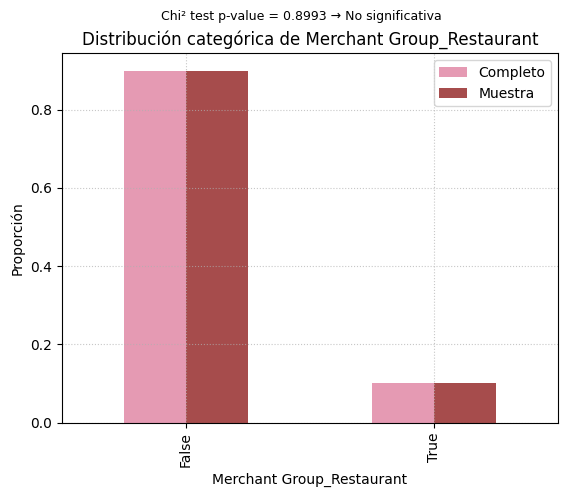

<Figure size 600x400 with 0 Axes>

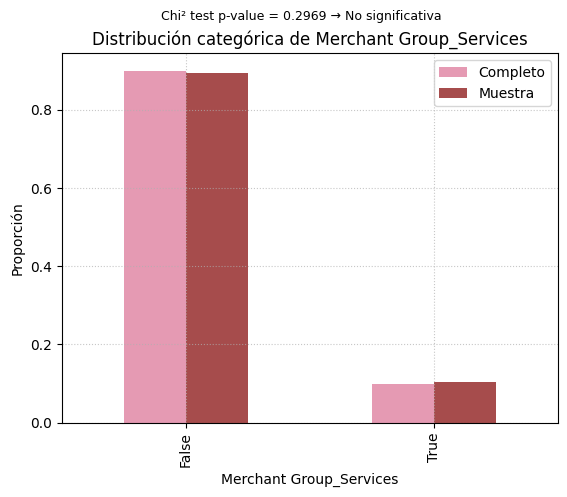

<Figure size 600x400 with 0 Axes>

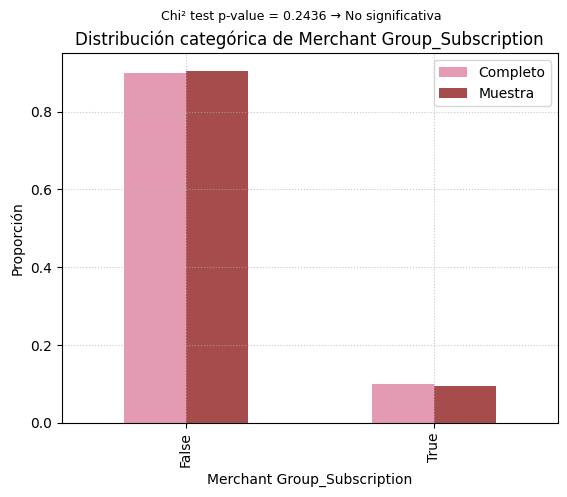

<Figure size 600x400 with 0 Axes>

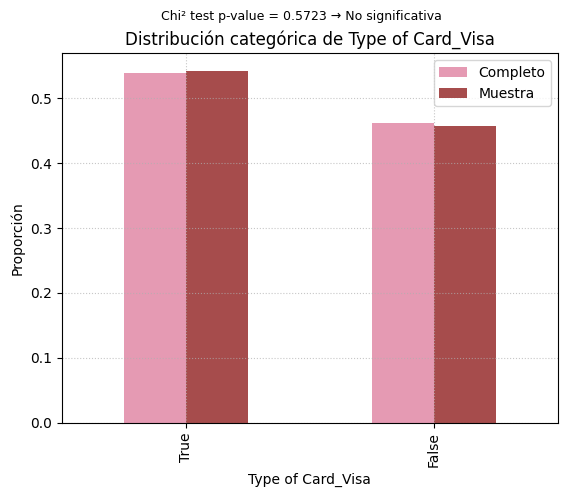

<Figure size 600x400 with 0 Axes>

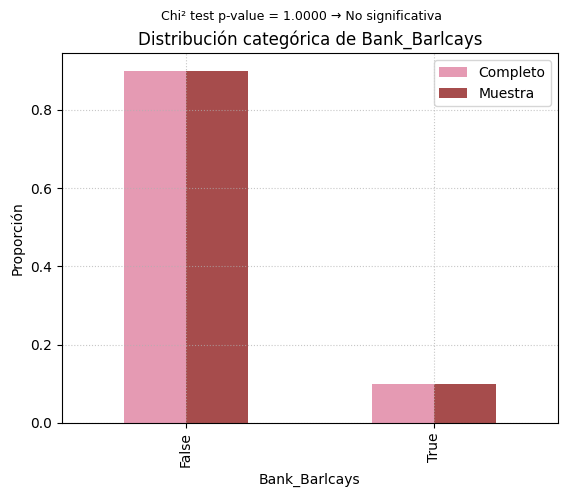

<Figure size 600x400 with 0 Axes>

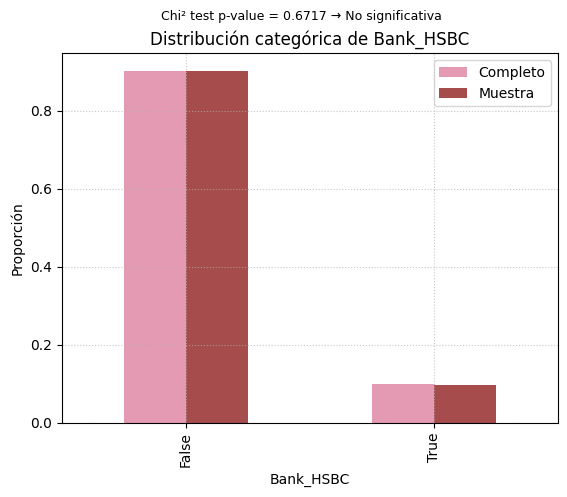

<Figure size 600x400 with 0 Axes>

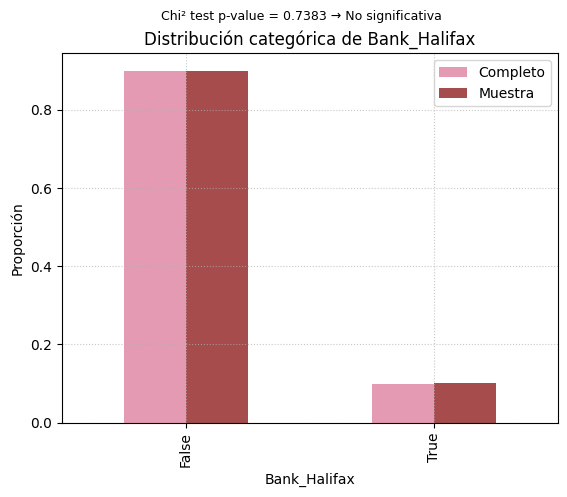

<Figure size 600x400 with 0 Axes>

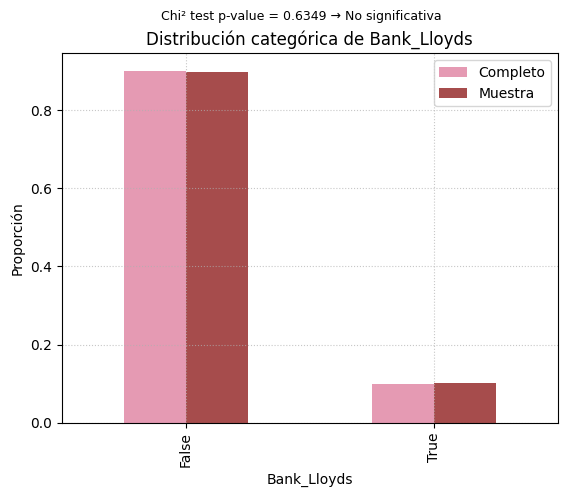

<Figure size 600x400 with 0 Axes>

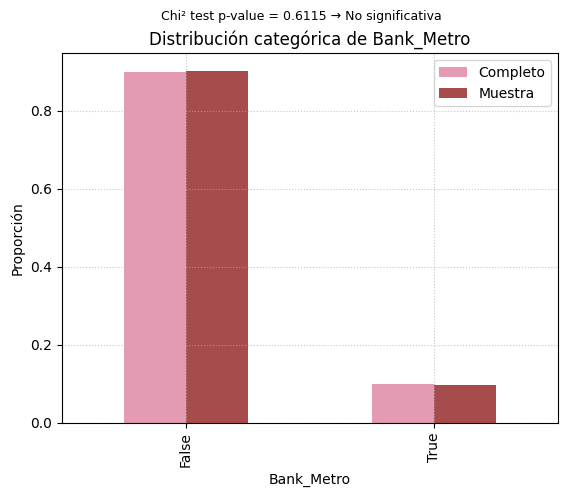

<Figure size 600x400 with 0 Axes>

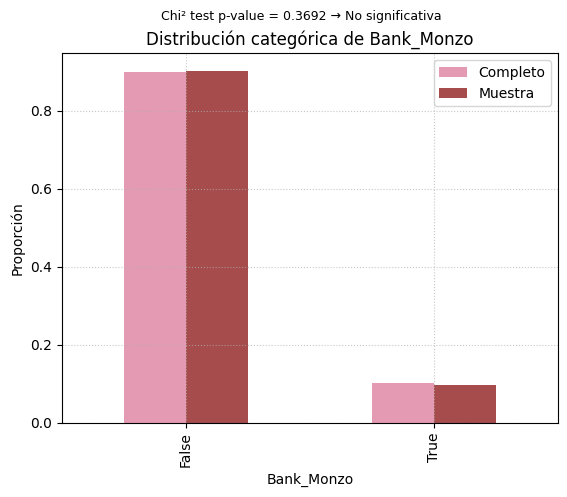

<Figure size 600x400 with 0 Axes>

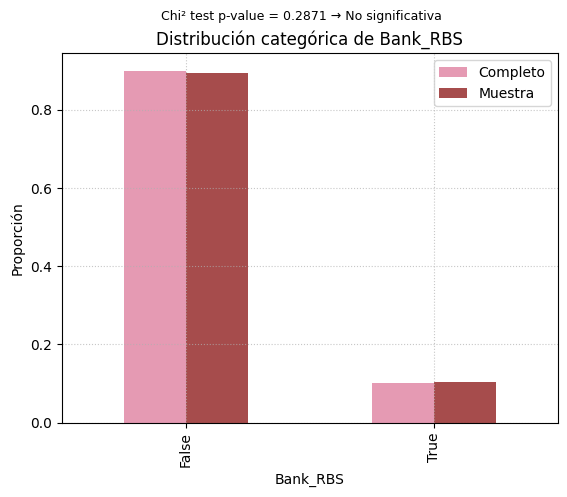

<Figure size 600x400 with 0 Axes>

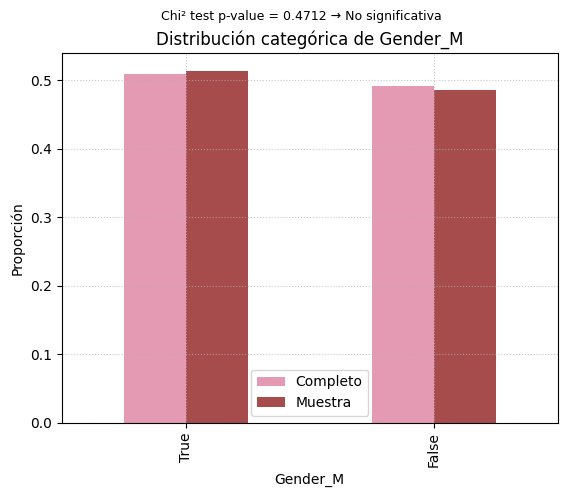

<Figure size 600x400 with 0 Axes>

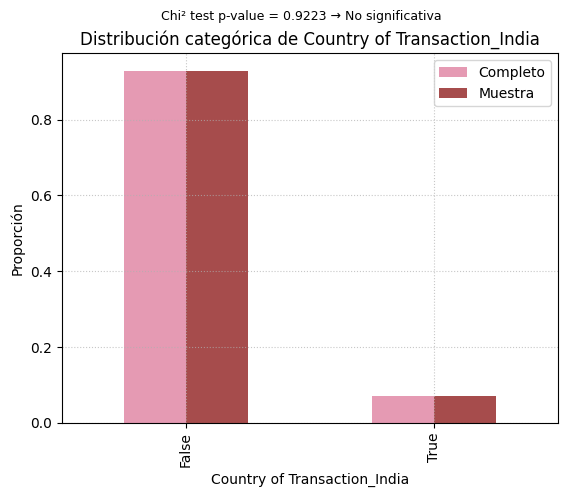

<Figure size 600x400 with 0 Axes>

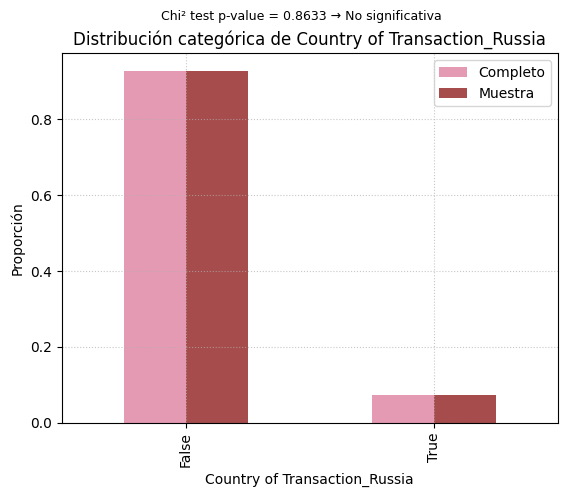

<Figure size 600x400 with 0 Axes>

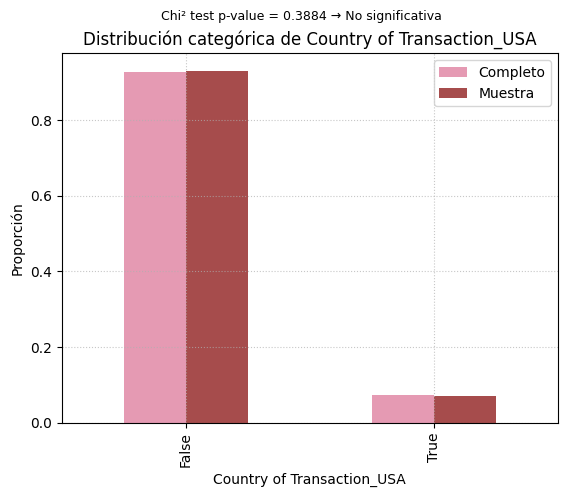

<Figure size 600x400 with 0 Axes>

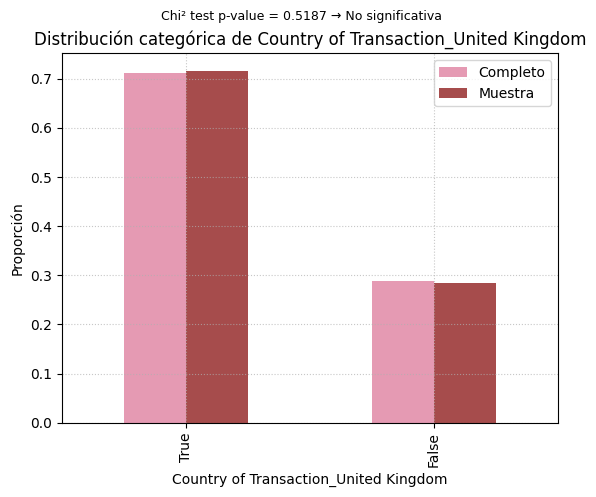

<Figure size 600x400 with 0 Axes>

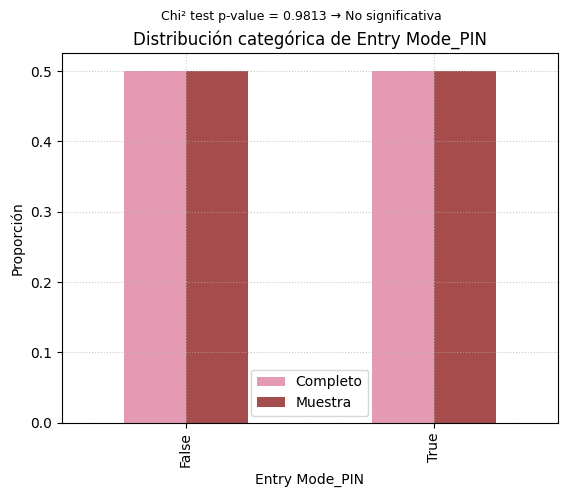

<Figure size 600x400 with 0 Axes>

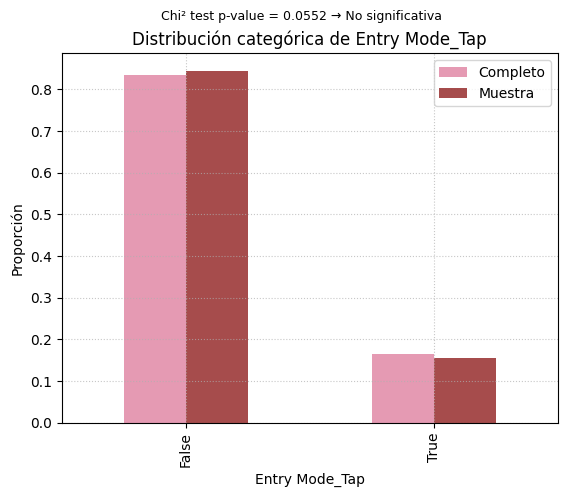

<Figure size 600x400 with 0 Axes>

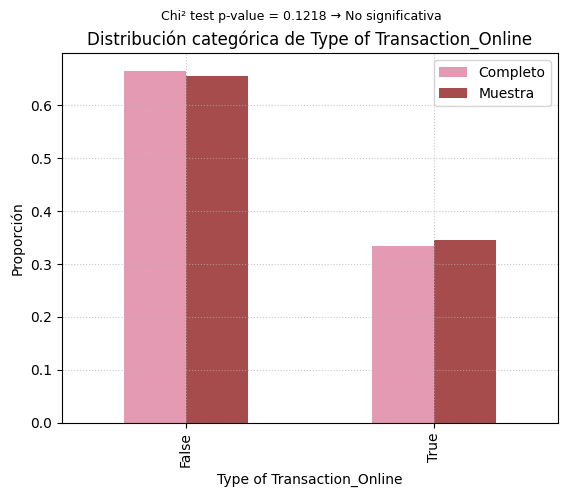

<Figure size 600x400 with 0 Axes>

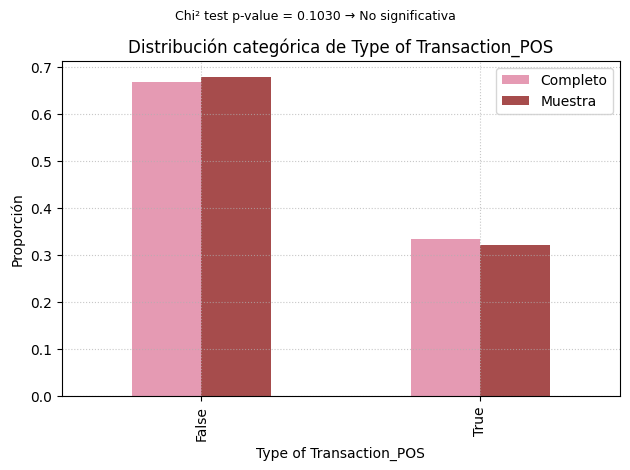

In [6]:
alpha = 0.05

numeric_cols = ['Time', 'Amount', 'Age']

resultados = []

for col in data.columns:
    if col in numeric_cols:
        stat, p = ks_2samp(
            data_original[col].dropna(),
            data[col].dropna()
        )
        tipo = 'Numérica (KS)'
    else:
        tabla = pd.crosstab(index=data_original[col], columns="Completo")\
            .join(pd.crosstab(index=data[col], columns="Muestra"), how="outer")\
            .fillna(0)
        chi2, p, dof, expected = chi2_contingency(tabla)
        tipo = 'Categórica (Chi²)'
    
    resultado = "Diferente" if p < alpha else "No significativa"
    resultados.append({'Variable': col, 'Tipo': tipo, 'p-value': p, 'Resultado': resultado})

df_resultados = pd.DataFrame(resultados).sort_values('p-value')

if any(df_resultados['Resultado'].str.contains('Diferente')):
    print("Existen variables significativamente diferentes entre la muestra y el dataset completo.")
else:
    print("No se detectaron diferencias significativas entre la muestra y el dataset completo.")

for col in data.columns:
    plt.figure(figsize=(6,4))
    
    if col in numeric_cols:
        sns.kdeplot(data_original[col], label='Completo', fill=True, alpha=0.3, color='palevioletred')
        sns.kdeplot(data[col], label='Muestra', fill=True, alpha=0.3, color='maroon')
        plt.title(f"Distribución numérica de {col}")
        plt.legend()
        plt.grid(linestyle=':', alpha=0.7)
        
        stat, p = ks_2samp(
            data_original[col].dropna(),
            data[col].dropna()
        )
        resultado = "No significativa" if p > alpha else "Diferente"
        plt.suptitle(f"KS test p-value = {p:.4f} → {resultado}", y=0.97, fontsize=9)
    else:
        prop_full = data_original[col].value_counts(normalize=True)
        prop_sample = data[col].value_counts(normalize=True)
        df_plot = pd.DataFrame({
            'Completo': prop_full,
            'Muestra': prop_sample,
        }).fillna(0)
        df_plot.plot(kind='bar', alpha=0.7, color=['palevioletred', 'maroon'])
        plt.title(f"Distribución categórica de {col}")
        plt.grid(linestyle=':', alpha=0.7)
        plt.ylabel("Proporción")
        plt.legend()

        tabla = pd.crosstab(index=data_original[col], columns="Completo")\
            .join(pd.crosstab(index=data[col], columns="Muestra"), how="outer")\
            .fillna(0)
        chi2, p, dof, expected = chi2_contingency(tabla)
        resultado = "No significativa" if p > alpha else "Diferente"
        plt.suptitle(f"Chi² test p-value = {p:.4f} → {resultado}", y=0.97, fontsize=9)

plt.tight_layout()
plt.show()


In [7]:
X, y = get_target(data)
X_scaled = scaler(X)
X_scaled

,Day of Week,Time,Amount,Age,Merchant Group_Electronics,Merchant Group_Entertainment,Merchant Group_Fashion,Merchant Group_Food,Merchant Group_Gaming,Merchant Group_Products,...,Bank_RBS,Gender_M,Country of Transaction_India,Country of Transaction_Russia,Country of Transaction_USA,Country of Transaction_United Kingdom,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_Online,Type of Transaction_POS
0,1.001802,1.193761,1.269267,-0.648882,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,1.001802,-0.668964,-0.883651,0.627008,True,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
2,-0.998201,1.380033,1.237253,-0.638914,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,1.001802,1.007488,0.068755,-1.256923,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
4,1.001802,-0.110146,0.444915,0.836334,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,1.001802,0.821216,-0.755596,0.407714,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4995,-0.998201,-1.227781,-0.771603,0.975884,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4996,1.001802,1.566306,1.269267,0.018967,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,False,True
4997,1.001802,-1.041509,0.572970,-2.363359,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


# Regresión Logística

## Regresión logística sin optimización bayesiana de hiperparámetro C

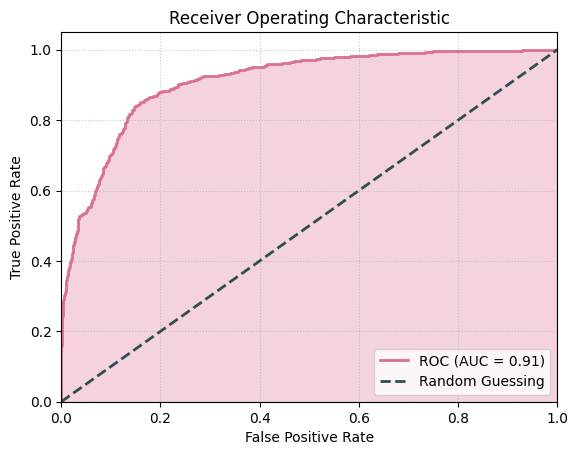

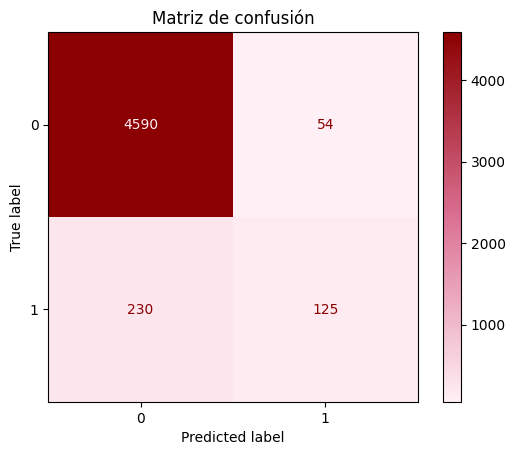

[{'model': 'Logistic Regression',
  'accuracy_mean': np.float64(0.9431895791583166),
  'accuracy_std': np.float64(0.010082704858583917),
  'roc_auc_mean': np.float64(0.9101344837702088),
  'roc_auc_std': np.float64(0.02111410658394684)}]

In [8]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

_, results = regresion_logistica(X_scaled, y, kfolds, C=1.0, plot=True)
results

## Regresión logística con optimización bayesiana de hiperparámetro C

In [9]:
n_iter = 30
gaussian_x = np.random.uniform(0.001, 5, size=(5, 1))
gaussian_y = []

for C in gaussian_x.flatten():
    auc_g, _ = regresion_logistica(X_scaled, y, kfolds, C, plot=False)
    gaussian_y.append(auc_g)

gaussian_y = np.array(gaussian_y)

for i in range(n_iter):
    kernel = 1.0 * RBF(length_scale=1.0)
    gp = GPR(kernel=kernel, n_restarts_optimizer=5, random_state=42)
    gp.fit(gaussian_x, gaussian_y)

    x_candidates = np.random.uniform(0.001, 5, size=(1000, 1))
    y_pred, y_std = gp.predict(x_candidates, return_std=True)

    y_upper = y_pred + 1.96 * y_std
    y_lower = y_pred - 1.96 * y_std
    diff = y_upper - y_lower
    max_idx = np.argmax(diff)
    C_new = x_candidates[max_idx, 0]

    auc_new_lr, _ = regresion_logistica(X_scaled, y, kfolds, C_new, plot=False)

    gaussian_x = np.vstack([gaussian_x, [[C_new]]])
    gaussian_y = np.append(gaussian_y, auc_new_lr)

    print(f"Iter {i+1:02d} | C: {C_new:.5f} | ROC AUC={auc_new_lr:.6f}")

best_idx = np.argmax(gaussian_y)
best_c_lr = gaussian_x[best_idx, 0]
best_score_lr = gaussian_y[best_idx]

print(f"Best C: {best_c_lr:.5f} with ROC AUC: {best_score_lr:.6f}")


Iter 01 | C: 4.99857 | ROC AUC=0.910253
Iter 02 | C: 4.47477 | ROC AUC=0.910272
Iter 03 | C: 0.33997 | ROC AUC=0.908951
Iter 04 | C: 3.94133 | ROC AUC=0.910316
Iter 05 | C: 1.49263 | ROC AUC=0.910177
Iter 06 | C: 4.81767 | ROC AUC=0.910266
Iter 07 | C: 0.61621 | ROC AUC=0.909779
Iter 08 | C: 3.53558 | ROC AUC=0.910284
Iter 09 | C: 0.11784 | ROC AUC=0.905930
Iter 10 | C: 2.59031 | ROC AUC=0.910285
Iter 11 | C: 2.23834 | ROC AUC=0.910262
Iter 12 | C: 1.08434 | ROC AUC=0.910205
Iter 13 | C: 2.65053 | ROC AUC=0.910309
Iter 14 | C: 3.74731 | ROC AUC=0.910288
Iter 15 | C: 1.03119 | ROC AUC=0.910183
Iter 16 | C: 0.33231 | ROC AUC=0.908932
Iter 17 | C: 3.88508 | ROC AUC=0.910303
Iter 18 | C: 3.46092 | ROC AUC=0.910236
Iter 19 | C: 2.27554 | ROC AUC=0.910255
Iter 20 | C: 0.67861 | ROC AUC=0.909812
Iter 21 | C: 3.40422 | ROC AUC=0.910226
Iter 22 | C: 3.38714 | ROC AUC=0.910246
Iter 23 | C: 1.66861 | ROC AUC=0.910183
Iter 24 | C: 2.36532 | ROC AUC=0.910267
Iter 25 | C: 1.90305 | ROC AUC=0.910299


# Máquina de soporte vectorial para clasificación con kernel RBF

## SVC sin optimización bayesiana de hiperparámetro C

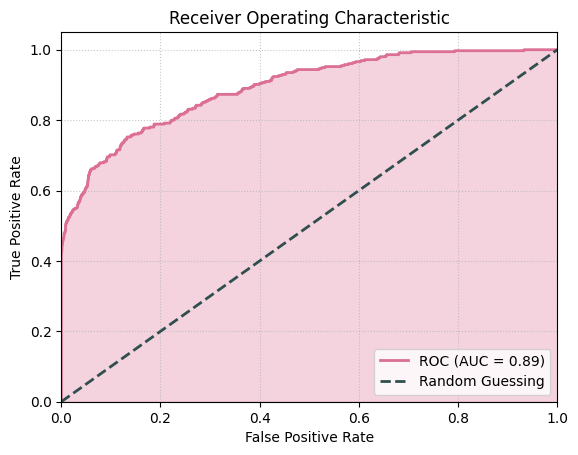

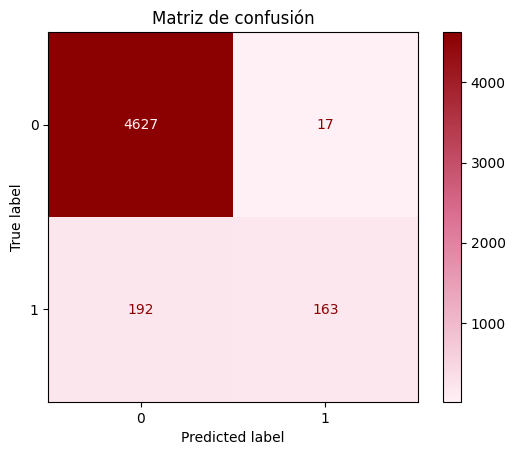

[{'model': 'Support Vector Machine',
  'accuracy_mean': np.float64(0.9581907815631263),
  'accuracy_std': np.float64(0.008077016756572018),
  'roc_auc_mean': np.float64(0.8907464059274804),
  'roc_auc_std': np.float64(0.03154053410036767)}]

In [10]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

_, results_svc = sup_vector_machine(X_scaled, y, kfolds, C=1.0, plot=True)
results_svc

## SVC con optimización bayesiana de hiperparámetro C

In [11]:
n_iter = 30

gaussian_x = np.random.uniform(0.001, 10, size=(5, 1)) 
gaussian_y = []

for C in gaussian_x.flatten():
    auc_g, _ = sup_vector_machine(X_scaled, y, kfolds, C, plot=False)
    gaussian_y.append(auc_g)

gaussian_y = np.array(gaussian_y)

for i in range(n_iter):
    kernel = 1.0 * RBF(length_scale=1.0)
    gp = GPR(kernel=kernel, n_restarts_optimizer=5, random_state=42)
    gp.fit(gaussian_x, gaussian_y)

    x_candidates = np.random.uniform(0.001, 10, size=(1000, 1))
    y_pred, y_std = gp.predict(x_candidates, return_std=True)

    y_upper = y_pred + 1.96 * y_std
    y_lower = y_pred - 1.96 * y_std
    diff = y_upper - y_lower
    max_idx = np.argmax(diff)
    xn = x_candidates[max_idx, 0]

    auc_new_svc, _ = sup_vector_machine(X_scaled, y, kfolds, xn, plot=False)

    gaussian_x = np.vstack([gaussian_x, [[xn]]])
    gaussian_y = np.append(gaussian_y, auc_new_svc)

    print(f"Iter {i+1:02d} | C: {xn:.5f} | ROC AUC={auc_new_svc:.4f}")

best_idx = np.argmax(gaussian_y)
best_c_svc = gaussian_x[best_idx, 0]
best_score_svc = gaussian_y[best_idx]

print(f"Best C: {best_c_svc:.5f} with ROC AUC: {best_score_svc:.4f}")

Iter 01 | C: 9.99233 | ROC AUC=0.9043
Iter 02 | C: 0.00269 | ROC AUC=0.8731
Iter 03 | C: 9.16252 | ROC AUC=0.9046
Iter 04 | C: 0.74060 | ROC AUC=0.8874
Iter 05 | C: 8.29228 | ROC AUC=0.9047
Iter 06 | C: 1.64421 | ROC AUC=0.8963
Iter 07 | C: 9.70492 | ROC AUC=0.9043
Iter 08 | C: 0.26556 | ROC AUC=0.8781
Iter 09 | C: 6.32365 | ROC AUC=0.9040
Iter 10 | C: 7.74305 | ROC AUC=0.9044
Iter 11 | C: 2.22104 | ROC AUC=0.8989
Iter 12 | C: 3.90343 | ROC AUC=0.9028
Iter 13 | C: 1.16216 | ROC AUC=0.8928
Iter 14 | C: 8.73588 | ROC AUC=0.9045
Iter 15 | C: 5.83824 | ROC AUC=0.9039
Iter 16 | C: 9.88186 | ROC AUC=0.9043
Iter 17 | C: 0.07868 | ROC AUC=0.8738
Iter 18 | C: 4.92446 | ROC AUC=0.9036
Iter 19 | C: 6.75197 | ROC AUC=0.9041
Iter 20 | C: 3.56620 | ROC AUC=0.9023
Iter 21 | C: 9.43663 | ROC AUC=0.9045
Iter 22 | C: 1.92666 | ROC AUC=0.8977
Iter 23 | C: 7.44819 | ROC AUC=0.9044
Iter 24 | C: 0.49645 | ROC AUC=0.8851
Iter 25 | C: 1.13516 | ROC AUC=0.8923
Iter 26 | C: 4.25428 | ROC AUC=0.9031
Iter 27 | C:

# Perceptrón multicapa

## MLP sin optimización de hiperparámetro neuronas por capa oculta

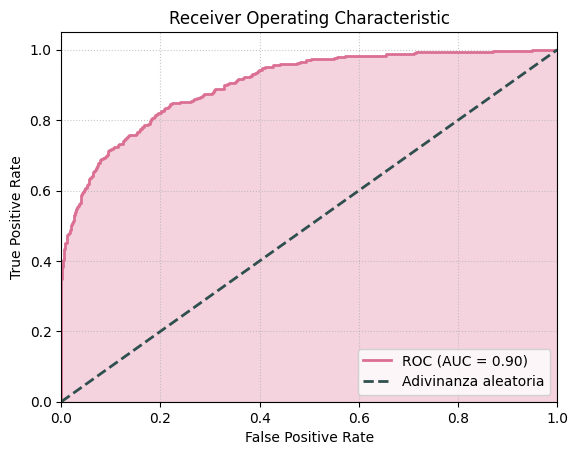

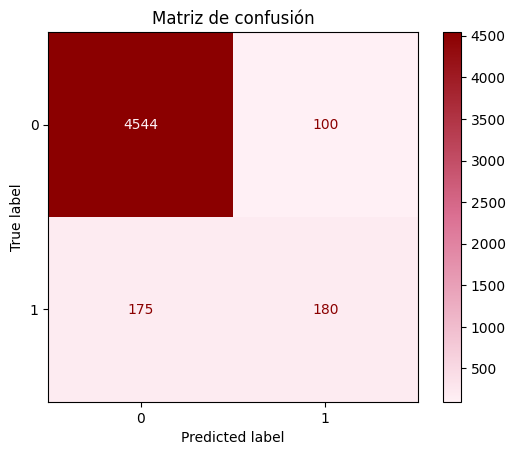

[{'model': 'MLP Classifier',
  'accuracy_mean': np.float64(0.9449891783567134),
  'accuracy_std': np.float64(0.010553644426694367),
  'roc_auc_mean': np.float64(0.9034990727312195),
  'roc_auc_std': np.float64(0.024995298586235455)}]

In [12]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

_, results_mlp = mlp_classifier(X_scaled, y, kfolds, plot=True)
results_mlp

## MLP con optimización de hiperparámetro neuronas por capa oculta

In [13]:
n_iter = 30
layer_range = (5, 50)  
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

gaussian_x = np.random.uniform(layer_range[0], layer_range[1], size=(5, 2))
gaussian_y = []

for h1, h2 in gaussian_x:
    auc_mean, _ = mlp_classifier(X, y, kfolds, plot=False, hidden_layer_sizes=(int(h1), int(h2)))
    gaussian_y.append(auc_mean)

gaussian_y = np.array(gaussian_y)

for i in range(n_iter):
    kernel = 1.0 * RBF(length_scale=1.0)
    gp = GPR(kernel=kernel, n_restarts_optimizer=5, random_state=42)
    gp.fit(gaussian_x, gaussian_y)

    x_candidates = np.random.uniform(layer_range[0], layer_range[1], size=(1000, 2))
    y_pred, y_std = gp.predict(x_candidates, return_std=True)

    y_upper = y_pred + 1.96 * y_std
    y_lower = y_pred - 1.96 * y_std
    diff = y_upper - y_lower
    max_idx = np.argmax(diff)
    xn = x_candidates[max_idx]

    auc_new_mlp, _ = mlp_classifier(X, y, kfolds, plot=False, hidden_layer_sizes=(int(xn[0]), int(xn[1])))

    gaussian_x = np.vstack([gaussian_x, [xn]])
    gaussian_y = np.append(gaussian_y, auc_new_mlp)

    print(f"Iter {i+1:02d} | Hidden Layers: ({int(xn[0])}, {int(xn[1])}) | ROC AUC={auc_new_mlp:.4f}")  

best_idx = np.argmax(gaussian_y)
best_layers = tuple(map(int, gaussian_x[best_idx]))
best_score_mlp = gaussian_y[best_idx]


print(f"\nBest hidden layers: {best_layers} | ROC AUC: {best_score_mlp:.4f}")

Iter 01 | Hidden Layers: (5, 48) | ROC AUC=0.8753
Iter 02 | Hidden Layers: (49, 5) | ROC AUC=0.9287
Iter 03 | Hidden Layers: (18, 5) | ROC AUC=0.9273
Iter 04 | Hidden Layers: (49, 49) | ROC AUC=0.9129
Iter 05 | Hidden Layers: (5, 5) | ROC AUC=0.9291
Iter 06 | Hidden Layers: (5, 33) | ROC AUC=0.9213
Iter 07 | Hidden Layers: (49, 17) | ROC AUC=0.9168
Iter 08 | Hidden Layers: (36, 5) | ROC AUC=0.9327
Iter 09 | Hidden Layers: (18, 49) | ROC AUC=0.9283
Iter 10 | Hidden Layers: (36, 49) | ROC AUC=0.9233
Iter 11 | Hidden Layers: (13, 34) | ROC AUC=0.9312
Iter 12 | Hidden Layers: (26, 14) | ROC AUC=0.9281
Iter 13 | Hidden Layers: (44, 44) | ROC AUC=0.9279
Iter 14 | Hidden Layers: (5, 15) | ROC AUC=0.8840
Iter 15 | Hidden Layers: (42, 11) | ROC AUC=0.9344
Iter 16 | Hidden Layers: (11, 10) | ROC AUC=0.9218
Iter 17 | Hidden Layers: (49, 41) | ROC AUC=0.9180
Iter 18 | Hidden Layers: (10, 44) | ROC AUC=0.9288
Iter 19 | Hidden Layers: (21, 24) | ROC AUC=0.9341
Iter 20 | Hidden Layers: (49, 27) | ROC

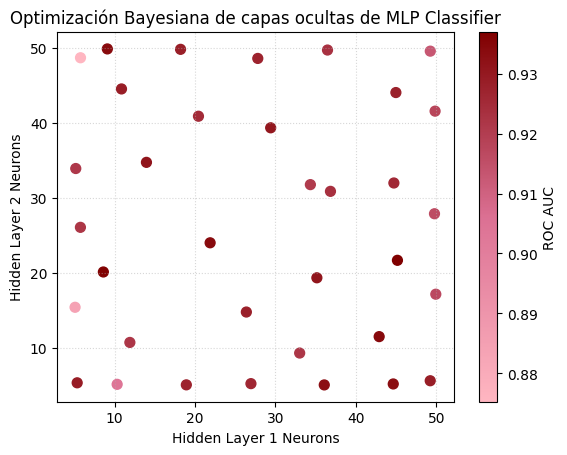

In [14]:
plt.scatter(gaussian_x[:, 0], gaussian_x[:, 1], c=gaussian_y, cmap=pink_cmap, s=50)
plt.colorbar(label='ROC AUC')
plt.xlabel('Hidden Layer 1 Neurons')
plt.ylabel('Hidden Layer 2 Neurons')
plt.title('Optimización Bayesiana de capas ocultas de MLP Classifier')
plt.grid(linestyle=':', alpha=0.5)
plt.show()

# Comparación de modelos sin optimización bayesiana de hiperparámetros

In [15]:
comparison_df = pd.DataFrame(results + results_svc + results_mlp)
comparison_df

,model,accuracy_mean,accuracy_std,roc_auc_mean,roc_auc_std
0,Logistic Regression,0.943190,0.010083,0.910134,0.021114
1,Support Vector Machine,0.958191,0.008077,0.890746,0.031541
2,MLP Classifier,0.944989,0.010554,0.903499,0.024995


# Comparación de modelos con optimización bayesiana de hiperparámetros

In [16]:
optim_comparison_df = pd.DataFrame({
    "ROC AUC": [best_score_lr, best_score_svc, best_score_mlp]
}, index=["Logistic Regression", "Support Vector Machine", "MLP Classifier"])

optim_comparison_df

,ROC AUC
Logistic Regression,0.910316
Support Vector Machine,0.904656
MLP Classifier,0.936939


# Conclusiones y resultados

En este proyecto se logró desarrollar y evaluar distintos modelos de clasificación para la detección de transacciones financieras fraudulentas. Se comenzó con un preprocesamiento de los datos, eliminando valores faltantes, columnas irrelevantes y transformando las variables categóricas en dummies, así como escalando las variables numéricas para garantizar la compatibilidad con los modelos de aprendizaje supervisado. Esta etapa permitió que los modelos trabajaran con datos limpios, homogéneos y representativos del comportamiento real de las transacciones.

Posteriormente, se implementaron tres tipos de modelos: Regresión Logística, Máquina de Soporte Vectorial (SVM) con kernel RBF y Perceptrón Multicapa (MLP). Cada modelo fue evaluado mediante validación cruzada utilizando métricas clave como ROC AUC y accuracy. Para optimizar su desempeño, se aplicó Optimización Bayesiana sobre los hiperparámetros principales (C para Regresión Logística y SVM, y 
configuración de capas ocultas para MLP), lo que permitió explorar eficientemente el espacio de parámetros y maximizar la capacidad predictiva de cada modelo.

Cabe destacar que, para poder utilizar una muestra correspondiente al 5 % del dataset original, es decir, un conjunto de 4 999 filas, se realizaron dos pruebas estadísticas. En primer lugar, se aplicó la prueba de Kolmogorov–Smirnov a las variables numéricas; y, en segundo lugar, la prueba de chi cuadrado (χ²) a las variables categóricas. El objetivo fue evaluar si existían diferencias significativas en las distribuciones entre el dataset original y la muestra seleccionada.

Es importante aclarar que una diferencia significativa indica que la distribución de la muestra difiere de la del conjunto de datos completo. Sin embargo, dado que ninguna de las características presentó diferencias significativas en las pruebas realizadas, se concluye que es válido utilizar el dataset reducido sin comprometer la representatividad ni la validez del análisis.

#### Regresion Logística

El modelo de Regresión Logística alcanzó una precisión promedio del 94.31%, lo que significa que predice correctamente si una transacción es verdadera o fraudulenta en la gran mayoría de los casos. Además, presentó una desviación estándar menor al 0.01, reflejando estabilidad en los distintos Kfolds.
Por otro lado, el área bajo la curva ROC (AUC) fue de 0.9101, lo que demuestra que el modelo tiene una gran capacidad para distinguir entre transacciones verdaderas y fraudulentas, diferenciando correctamente ambas clases en el 91% de las ocasiones.


Después de aplicar la optimización bayesiana para determinar el valor del parámetro C que maximizara el AUC, se encontró un valor óptimo de 3.9, alcanzando un ROC AUC de 0.9103. Al comparar este resultado con el modelo previo, se observa que la mejora fue mínima (0.0002), lo que indica que el modelo ya estaba adecuadamente ajustado antes del proceso de optimización.

#### Modelo SVM (Con kernel RBF)

El modelo SVM con kernel RBF alcanzó una precisión promedio del 95.82% al clasificar transacciones como legítimas o fraudulentas, con una desviación estándar de 0.008, lo que refleja una buena estabilidad en los diferentes subconjuntos.
Por su parte, el área bajo la curva ROC (AUC) fue de 0.89, ligeramente inferior al valor obtenido por la Regresión Logística y el MLP, y con una desviación estándar mayor (0.03). Esto indica que el rendimiento del SVM varía un poco más según los datos de entrenamiento, aunque en general mantiene un buen desempeño para distinguir entre transacciones reales y fraudulentas. 

Tras aplicar la optimización bayesiana, se determinó un valor óptimo de C = 8.29, lo que indica que el modelo penaliza con mayor intensidad los errores de clasificación en comparación con la Regresión Logística.
Con este ajuste, el modelo alcanzó un ROC AUC de 0.90, indicando una ligera mejora en su capacidad de discriminación respecto al desempeño obtenido antes de la optimización.
  
#### MLP Classifier

Por último, el MLP Classifier presentó un accuracy promedio similar a la Regresión Logística (0.925) y un ROC AUC de 0.864, con desviaciones estándar comparables. Esto indica que, aunque es un modelo más complejo y capaz de capturar relaciones no lineales, no mejora significativamente el desempeño frente a modelos lineales en este caso particular. Su estabilidad es buena, pero el aumento de complejidad no se traduce en un beneficio claro, lo que sugiere que la relación entre variables y la clase objetivo podría ser mayormente lineal.

Con el Perceptrón Multicapa se alcanzó una precisión promedio del 94.49% con una desviación estándar de 0.01, indicando que el modelo tiene buena capacidad para predecir correctamente entre transacciones legítimas o fraudulentas. 
El área bajo la curva ROC fue de 0.9034.

Con la optimización bayesiana se encontró que la red neuronal óptima para este modelo tiene dos capas ocultas, la primera con 45 neuronas y la segunda con 21. Con esta configuración, el modelo alcanzó un ROC AUC de 0.9369, lo que representa una mejora del 3.35 % respecto al desempeño obtenido antes de la optimización.


#### Mejor modelo

El mejor modelo inicialmente fue Regresión logística, sin embargo, la optimización mostró mejoras mínimas en el desempeño. 

Gracias a la optimización bayesiana, se concluyó que el modelo óptimo es el Perceptrón Multicapa (MLP), mostrando el mejor desempeño global, ya que alcanzó un ROC AUC de 0.9369, superando tanto a la Regresión Logística (0.9103) como al SVM (0.90). Esto indica que el modelo MLP tiene una mayor capacidad de discriminación entre transacciones fraudulentas y legítimas. 

Además, aunque la precisión promedio entre los tres modelos es bastante es similar, la mejora significativa en AUC (+3.35%) del MLP tras aplicar la optimización, indica que clasifica mejor los casos difíciles, especialmente los fraudes.

# Referencias

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). *Scikit-learn: Machine learning in Python.* Journal of Machine Learning Research, 12, 2825–2830. https://jmlr.org/papers/v12/pedregosa11a.html

Scikit-learn developers. (2024). *scikit-learn: Machine Learning in Python (version 1.5)* [Software]. GitHub. https://scikit-learn.org/stable/

Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). *Applied Logistic Regression* (3rd ed.). Wiley.

Bishop, C. M. (2006). *Pattern Recognition and Machine Learning.* Springer.

Cortes, C., & Vapnik, V. (1995). *Support-vector networks.* Machine Learning, 20(3), 273–297. https://doi.org/10.1007/BF00994018

Schölkopf, B., & Smola, A. J. (2002). *Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond.* MIT Press.

Rosenblatt, F. (1958). *The perceptron: A probabilistic model for information storage and organization in the brain.* Psychological Review, 65(6), 386–408. https://doi.org/10.1037/h0042519

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning.* MIT Press. https://www.deeplearningbook.org/

Rasmussen, C. E., & Williams, C. K. I. (2006). *Gaussian Processes for Machine Learning.* MIT Press. https://gaussianprocess.org/gpml/

Brochu, E., Cora, V. M., & de Freitas, N. (2010). *A tutorial on Bayesian optimization of expensive cost functions, with application to active user modeling and hierarchical reinforcement learning.* arXiv preprint arXiv:1012.2599.

Massey, F. J. (1951). *The Kolmogorov–Smirnov test for goodness of fit.* Journal of the American Statistical Association, 46(253), 68–78. https://doi.org/10.1080/01621459.1951.10500769

Pearson, K. (1900). *On the criterion that a given system of deviations from the probable in the case of a correlated system of variables is such that it can be reasonably supposed to have arisen from random sampling.* Philosophical Magazine, 50(302), 157–175. https://doi.org/10.1080/14786440009463897

Montgomery, D. C., & Runger, G. C. (2014). *Applied Statistics and Probability for Engineers* (6th ed.). Wiley.
